# Enrolments Data

## Exploration
### Statistical exploration

#### Reading the data, removing useless columns and adding special columns

In [186]:
import pandas as pd
import numpy as np

In [187]:
enrolments = pd.read_csv("data/courses snap_sales_funnel 2017-07-05T1254.csv",low_memory=False)

In [188]:
enrolments.columns

Index(['Startdate', 'Enddate', 'Metro', 'Course', 'PhoneValid', 'Price',
       'Type', 'DaysEnroltoStart', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'EnrolDay', 'EnrolHour', 'Month', 'EnrolWeek', 'Year',
       'CanceledDate', 'CanceledMonth', 'ExpectedPayment', 'PardotCategory',
       'ApplicationType', 'LeadID', 'Status', 'OppCreatedDate',
       'OppOwnerMetro', 'SpeedtoLead', 'CampaignSource',
       'CampaignSourceCategory'],
      dtype='object')

##### Columns
- 'Startdate' = Enrolment course start date
- 'Enddate'= Enrolment course end date
- 'Metro' = Enrolment course location
- 'Course' = Enrolment course (WDi, DAT, etc.)
- 'PhoneValid' = Whether enrolment has valid phone number
- 'Price' = Enrolment course price
- 'Type' = Enrolment course type (immersive, part-time, remote)
- 'DaysEnroltoStart' = Days between enrolment and course start date
- 'DaysInvoicetoEnrol'= Days between invoice and enrolment
- 'DaysLeadtoEnroled' = Days between lead entry (e.g. website visit) to enrolment
- 'EnrolDate' = Date of enrolment
- 'EnrolDay' = Day (of the week) of enrolment
- 'EnrolHour' = Hour of enrolment
- 'Month' = Month of enrolment
- 'EnrolWeek' = Week of enrolment
- 'Year' = Year of enrolment
- 'CanceledDate' = Date cancelled
- 'CanceledMonth' = Month cancelled
- 'ExpectedPayment' = Method of expected payment (e.g. employer paid, personal loan, etc.)
- 'PardotCategory' = Category of lead - how did they enter our system?
- 'ApplicationType' = Type of application
- 'LeadID' = ID of lead
- 'Status'= Status of lead
- 'OppCreatedDate' = Date lead creation
- 'OppOwnerMetro' = Metro of lead creation
- 'SpeedtoLead' = Time taken to contact lead
- 'CampaignSource' = Source of campaign
- 'CampaignSourceCategory' = Category of source of campaign

In [189]:
enrolments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50407 entries, 0 to 50406
Data columns (total 28 columns):
Startdate                 50407 non-null int64
Enddate                   50407 non-null int64
Metro                     50407 non-null object
Course                    50407 non-null object
PhoneValid                50407 non-null object
Price                     50406 non-null float64
Type                      50407 non-null object
DaysEnroltoStart          46003 non-null float64
DaysInvoicetoEnrol        50407 non-null int64
DaysLeadtoEnroled         50407 non-null int64
EnrolDate                 50407 non-null int64
EnrolDay                  50407 non-null object
EnrolHour                 50407 non-null int64
Month                     50407 non-null int64
EnrolWeek                 50407 non-null int64
Year                      50407 non-null int64
CanceledDate              9327 non-null float64
CanceledMonth             9327 non-null float64
ExpectedPayment           38772 no

In [207]:
#23.4 and 23.9
#enrolments.columns
#limiteddays = enrolments[(enrolments.DaysEnroltoStart>23) & (enrolments.DaysEnroltoStart<24)]
#limiteddays.head()

,Startdate,Enddate,Metro,Course,PhoneValid,Price,Type,DaysEnroltoStart,DaysInvoicetoEnrol,DaysLeadtoEnroled,...,ExpectedPayment,PardotCategory,ApplicationType,LeadID,Status,OppCreatedDate,OppOwnerMetro,SpeedtoLead,CampaignSource,CampaignSourceCategory


##### Remove some useless columns or unused columns (with majority null value)

In [5]:
enrolments.drop('Status', axis=1, inplace=True)
enrolments.drop('CampaignSourceCategory',axis=1,inplace=True)
enrolments.drop('CampaignSource',axis=1,inplace=True)
enrolments.drop('OppOwnerMetro', axis=1, inplace=True)
enrolments.drop('OppCreatedDate', axis=1, inplace=True)
enrolments.drop('LeadID', axis=1, inplace=True)
enrolments.drop('SpeedtoLead', axis=1, inplace=True)
enrolments.columns

Index(['Startdate', 'Enddate', 'Metro', 'Course', 'PhoneValid', 'Price',
       'Type', 'DaysEnroltoStart', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'EnrolDay', 'EnrolHour', 'Month', 'EnrolWeek', 'Year',
       'CanceledDate', 'CanceledMonth', 'ExpectedPayment', 'PardotCategory',
       'ApplicationType'],
      dtype='object')

In [6]:
#Add cancelled column to track whether an enrolment cancelled
enrolments['Cancelled'] = enrolments.CanceledDate.notnull()
enrolments.drop('CanceledDate', axis=1, inplace=True)
enrolments.drop('CanceledMonth', axis=1, inplace=True)

In [7]:
#Add an APAC column
enrolments['APAC'] = enrolments['Metro'].isin(['sydney','melbourne','hong-kong','singapore','brisbane'])
enrolments.APAC.value_counts()

False    42530
True      7877
Name: APAC, dtype: int64

In [8]:
#Limit to only post mid-2014 data and pre mid-2017 data
enrolments = enrolments[enrolments.EnrolDate > 20140630]
enrolments = enrolments[enrolments.Startdate < 20170630]

In [9]:
#Cancellations are enroled before their course starts, so daysenroltostart must be positive
enrolments = enrolments[enrolments.DaysEnroltoStart > 0]

In [10]:
#Some anomalies in the price data - restrictions!
enrolments = enrolments[enrolments.Price < 20000]

In [11]:
#enrolments.info()
#enrolments.describe()
#enrolments.shape
#enrolments.columns

#### Dealing with null values

In [12]:
enrolments.isnull().sum()

Startdate                0
Enddate                  0
Metro                    0
Course                   0
PhoneValid               0
Price                    0
Type                     0
DaysEnroltoStart         0
DaysInvoicetoEnrol       0
DaysLeadtoEnroled        0
EnrolDate                0
EnrolDay                 0
EnrolHour                0
Month                    0
EnrolWeek                0
Year                     0
ExpectedPayment       3035
PardotCategory         665
ApplicationType          0
Cancelled                0
APAC                     0
dtype: int64

In [13]:
#enrolments.Price.fillna(0, inplace=True)

In [14]:
enrolments['ExpectedPayment'] = enrolments.ExpectedPayment.map({
    'Student / Self': 'Student / Self',
    'Student (self)': 'Student / Self',
    'Employer': 'Employer',
    'Loan (Partner, please note)': 'Loan Partner',
    'Veterans Affairs': 'Veterans Affairs',
    'Employer Bulk Pre-paid': 'Employer',
    'Scholarship (Opportunity Fund)': 'Scholarship',
    'Loan Partner (please note)': 'Loan Partner',
    'Family':'Family',
    'Other (please note)':'Other',
    'GA Employee/Instructor':'GA Employee/Instructor',
    'Loan (Private Bank, please note)':'Loan (Private)',
    'Government Funding / Grant':'Government Funding / Grant',
    'Other':'Other',
    'CourseHorse':'Other',
    'Opportunity Fund':'Scholarship',
    'Enterprise Credit':'Other',
    'Scholarship (GA Partner, please note)':'Scholarship',
    'Scholarship (Other, please note)':'Scholarship',
})
enrolments.ExpectedPayment.fillna("Unknown", inplace=True)
enrolments.ExpectedPayment.value_counts()

Student / Self                24192
Employer                       3249
Unknown                        3035
Loan Partner                   1603
Veterans Affairs                176
Scholarship                     142
Family                           88
Other                            76
Loan (Private)                   50
Government Funding / Grant       48
GA Employee/Instructor           40
Name: ExpectedPayment, dtype: int64

In [15]:
enrolments.PardotCategory.fillna("Unknown", inplace=True)
enrolments.PardotCategory.value_counts()

GA Course Leads                15387
Website                         4918
CWE Purchase                    3922
Facebook Acquisition            1363
Other                           1212
GA Dash                         1198
Sweepstake                      1102
Unknown                          675
GA Front Row Signup              468
Partner Event                    406
Twitter Promoted                 364
GA Circuits Leads                308
Twitter Acquisition              200
Uncategorized                    182
Student Enrollment               137
Content Partnership              127
Livestream Purchase              120
Scholarship                       90
Partner Livestream                81
CWE Walk Ins                      75
Global Acquisition Campaign       73
Free Front Row Trial Local        53
GA Content                        42
GA Event                          29
Social Organic                    29
GA Blog                           25
LinkedIn Acquisition              22
L

In [16]:
#enrolments.SpeedtoLead.value_counts()
#enrolments.SpeedtoLead.fillna(enrolments.SpeedtoLead.mean(), inplace=True)

In [17]:
enrolments.isnull().sum()

Startdate             0
Enddate               0
Metro                 0
Course                0
PhoneValid            0
Price                 0
Type                  0
DaysEnroltoStart      0
DaysInvoicetoEnrol    0
DaysLeadtoEnroled     0
EnrolDate             0
EnrolDay              0
EnrolHour             0
Month                 0
EnrolWeek             0
Year                  0
ExpectedPayment       0
PardotCategory        0
ApplicationType       0
Cancelled             0
APAC                  0
dtype: int64

#### Streamlining multiple categories
##### Most common application types

In [18]:
#Checkout and include only the more common application types
commonapptypes = enrolments.ApplicationType.value_counts().index[enrolments.ApplicationType.value_counts()>147]
enrolments = enrolments[enrolments.ApplicationType.isin(commonapptypes)]
enrolments.shape

(31377, 21)

In [19]:
enrolments.ApplicationType.value_counts()

apply now               10942
request info            10544
info session             6721
referral                  763
invoice                   473
contact_admissions        437
get notified              411
financing contact us      370
cwe_feedback              362
trial class               193
lander                    161
Name: ApplicationType, dtype: int64

##### Most common Pardot types

In [20]:
#Checkout only and include the more common Pardot types
commonpdtypes = enrolments.PardotCategory.value_counts().index[enrolments.PardotCategory.value_counts()>100]
enrolments = enrolments[enrolments.PardotCategory.isin(commonpdtypes)]
enrolments.shape

(30824, 21)

In [21]:
enrolments.PardotCategory.value_counts()

GA Course Leads         15020
Website                  4696
CWE Purchase             3705
Facebook Acquisition     1304
Other                    1141
GA Dash                  1137
Sweepstake               1049
Unknown                   603
GA Front Row Signup       454
Partner Event             387
Twitter Promoted          347
GA Circuits Leads         255
Twitter Acquisition       194
Uncategorized             180
Student Enrollment        120
Content Partnership       117
Livestream Purchase       115
Name: PardotCategory, dtype: int64

##### Most common courses

In [22]:
commoncourses = enrolments.Course.value_counts().index[enrolments.Course.value_counts()>100]
enrolments = enrolments[enrolments.Course.isin(commoncourses)]
enrolments.shape

(30622, 21)

##### Mapping PhoneValid field to yes and no

In [23]:
enrolments.PhoneValid.unique()
enrolments['PhoneValid'] = enrolments.PhoneValid.map({'Yes': 1,'No': 0})

In [24]:
enrolments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30622 entries, 758 to 42687
Data columns (total 21 columns):
Startdate             30622 non-null int64
Enddate               30622 non-null int64
Metro                 30622 non-null object
Course                30622 non-null object
PhoneValid            30622 non-null int64
Price                 30622 non-null float64
Type                  30622 non-null object
DaysEnroltoStart      30622 non-null float64
DaysInvoicetoEnrol    30622 non-null int64
DaysLeadtoEnroled     30622 non-null int64
EnrolDate             30622 non-null int64
EnrolDay              30622 non-null object
EnrolHour             30622 non-null int64
Month                 30622 non-null int64
EnrolWeek             30622 non-null int64
Year                  30622 non-null int64
ExpectedPayment       30622 non-null object
PardotCategory        30622 non-null object
ApplicationType       30622 non-null object
Cancelled             30622 non-null bool
APAC               

### Visualisation
#### Exploring the data visually

In [25]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import urllib

%matplotlib inline
sns.set(color_codes=True)

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


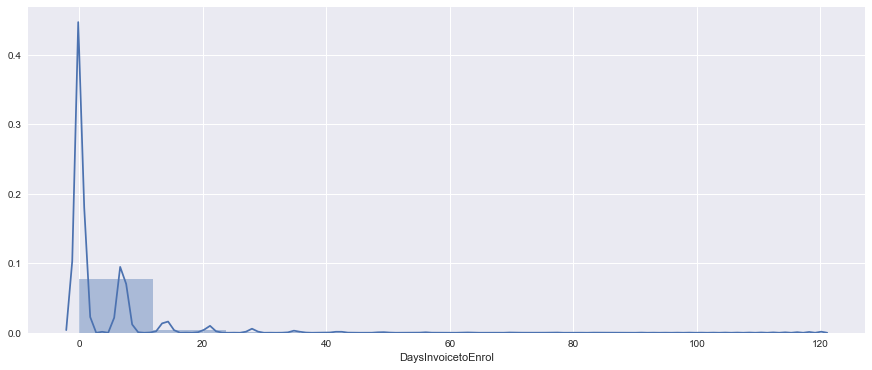

In [26]:
plt.figure(figsize = (15,6))
sns.distplot(enrolments.DaysInvoicetoEnrol, bins=10)

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


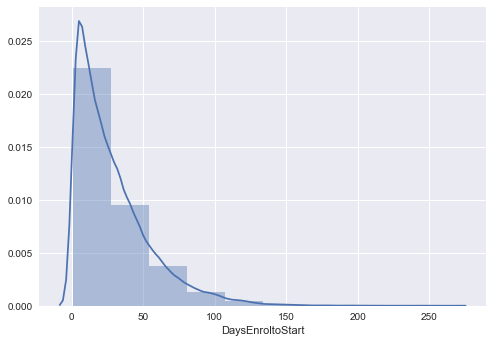

In [27]:
sns.distplot(enrolments.DaysEnroltoStart, bins=10)

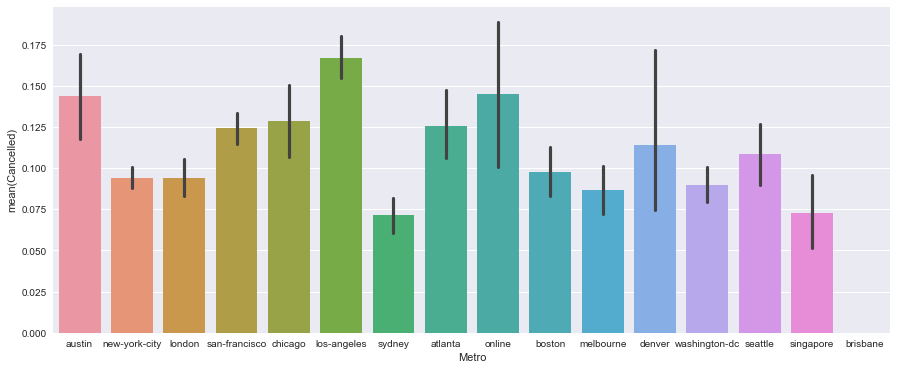

In [28]:
plt.figure(figsize = (15,6))
sns.barplot(x='Metro', y = 'Cancelled', data = enrolments)

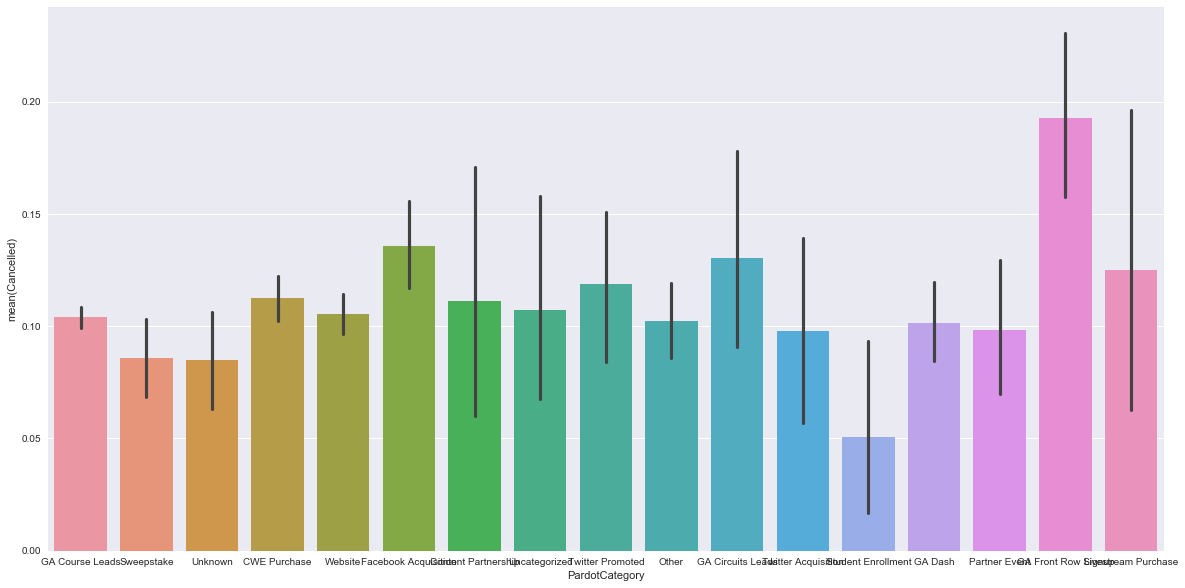

In [29]:
plt.figure(figsize = (20,10))
sns.barplot(x='PardotCategory', y = 'Cancelled', data = enrolments)

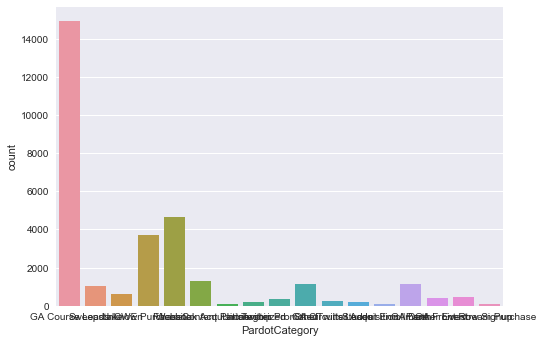

In [30]:

sns.countplot(x= enrolments.PardotCategory, data = enrolments)

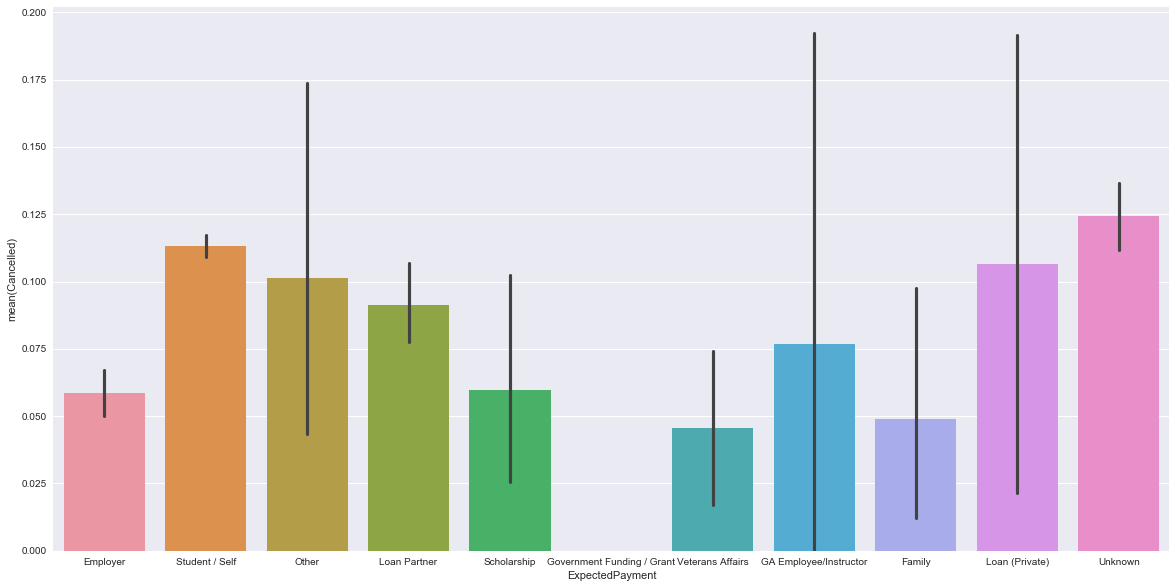

In [31]:
plt.figure(figsize = (20,10))
sns.barplot(x='ExpectedPayment', y = 'Cancelled', data = enrolments)

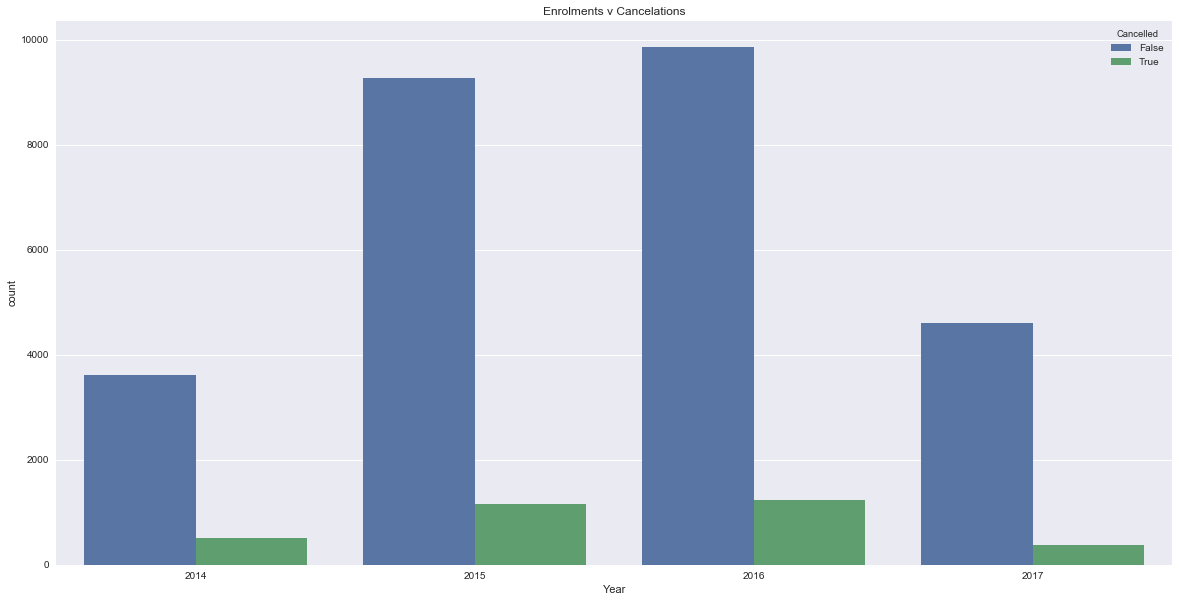

In [32]:
plt.figure(figsize=(20,10))
plt.title("Enrolments v Cancelations")
sns.countplot(x='Year', hue='Cancelled', data = enrolments)

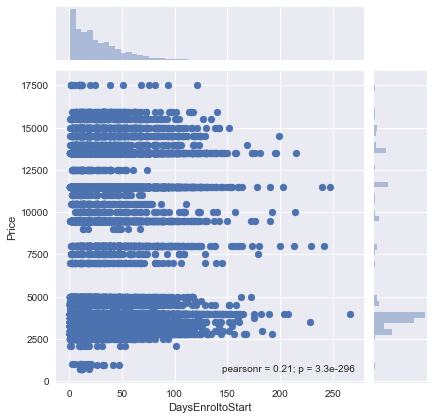

In [33]:
sns.jointplot(x='DaysEnroltoStart', y="Price", data=enrolments)

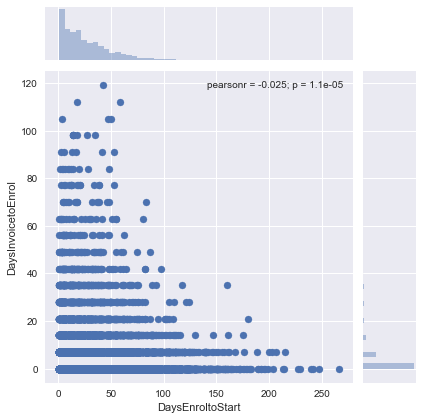

In [34]:
sns.jointplot(x='DaysEnroltoStart', y="DaysInvoicetoEnrol", data=enrolments)

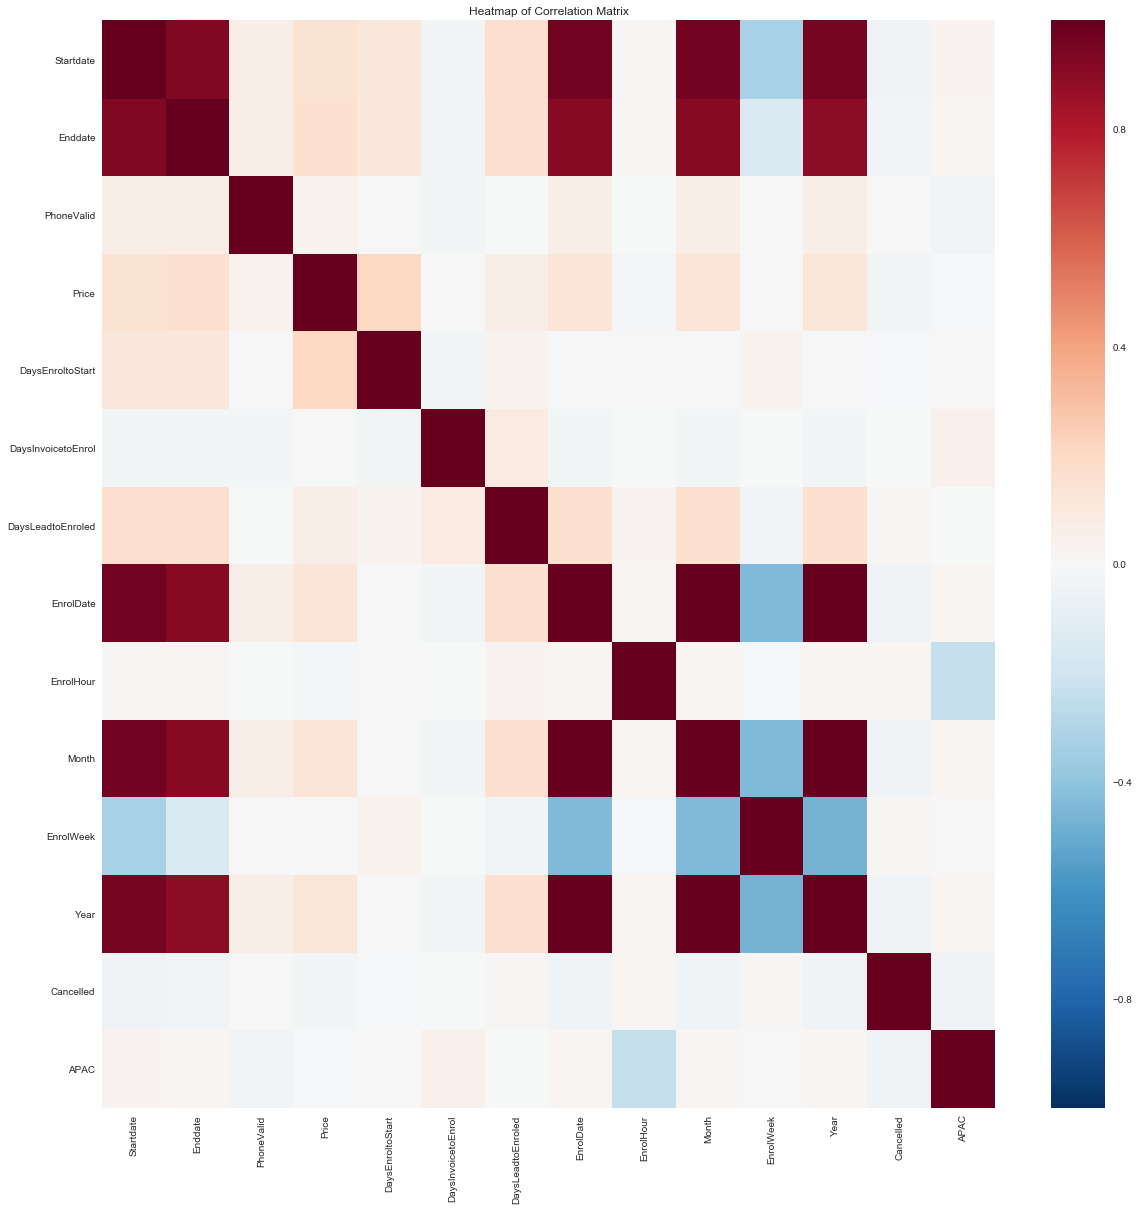

In [35]:
corr = enrolments.corr()
corr = (corr)
plt.figure(figsize = (20,20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

In [78]:
import pandas_profiling
pandas_profiling.ProfileReport(enrolments)

Number of variables,22
Number of observations,30622
Total Missing (%),0.0%
Total size in memory,4.7 MiB
Average record size in memory,162.0 B
Numeric,11
Categorical,7
Date,0
Text (Unique),0
Rejected,4
Distinct count,2


## Running dummy data
- These columns have text outputs:
 - Metro: object
 - Course: object
 - Type: object
 - EnrolDay: object
 - ExpectedPayment: object
 - ApplicationType: object
 - PardotCategory: object

In [36]:
enrolments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30622 entries, 758 to 42687
Data columns (total 21 columns):
Startdate             30622 non-null int64
Enddate               30622 non-null int64
Metro                 30622 non-null object
Course                30622 non-null object
PhoneValid            30622 non-null int64
Price                 30622 non-null float64
Type                  30622 non-null object
DaysEnroltoStart      30622 non-null float64
DaysInvoicetoEnrol    30622 non-null int64
DaysLeadtoEnroled     30622 non-null int64
EnrolDate             30622 non-null int64
EnrolDay              30622 non-null object
EnrolHour             30622 non-null int64
Month                 30622 non-null int64
EnrolWeek             30622 non-null int64
Year                  30622 non-null int64
ExpectedPayment       30622 non-null object
PardotCategory        30622 non-null object
ApplicationType       30622 non-null object
Cancelled             30622 non-null bool
APAC               

In [37]:
dummydata = pd.get_dummies(data=enrolments, columns = ['Metro','Course','Type','ExpectedPayment','ApplicationType','PardotCategory','EnrolDay'], prefix = ['Metro','Course','Type','ExpectedPayment','ApplicationType','PardotCategory','EnrolDay'] )

In [38]:
dummydata.shape

(30622, 95)

In [39]:
dummydata.columns

Index(['Startdate', 'Enddate', 'PhoneValid', 'Price', 'DaysEnroltoStart',
       'DaysInvoicetoEnrol', 'DaysLeadtoEnroled', 'EnrolDate', 'EnrolHour',
       'Month', 'EnrolWeek', 'Year', 'Cancelled', 'APAC', 'Metro_atlanta',
       'Metro_austin', 'Metro_boston', 'Metro_brisbane', 'Metro_chicago',
       'Metro_denver', 'Metro_london', 'Metro_los-angeles', 'Metro_melbourne',
       'Metro_new-york-city', 'Metro_online', 'Metro_san-francisco',
       'Metro_seattle', 'Metro_singapore', 'Metro_sydney',
       'Metro_washington-dc', 'Course_android-development-immersive',
       'Course_back-end-web-development', 'Course_data-analytics',
       'Course_data-science', 'Course_data-science-immersive',
       'Course_digital-marketing', 'Course_front-end-web-development',
       'Course_ios-development', 'Course_javascript-development',
       'Course_product-management', 'Course_product-management-immersive',
       'Course_user-experience-design',
       'Course_user-experience-design-imme

# Next step:
## Let's try some modeling!

#### What's our baseline?

It's important to have some baseline to compare it to, so let's look at what the chance of picking a student at random and picking a cancellation:

In [40]:
cancels = dummydata.Cancelled.value_counts()

In [41]:
#Percentage of enrolments that cancel:
Percent = (1-cancels[0]/(cancels[0]+cancels[1]))
Percent

0.10691659591143621

In [42]:
all_ftcolumns = dummydata.columns.tolist()
all_ftcolumns.remove('Cancelled')
all_ftcolumns


X = dummydata[all_ftcolumns]
y = dummydata.Cancelled

In [43]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)

- Because we're looking at predicting cancellation (predicting "1" for the "Cancelled" attribute), a confusion matrix, sensitivity and specificity are good mechanisms for testing the accuracy of a model!
- Sensitivity is the number of true positives as a percentage of all predicted positives.
- Specificity is the number of true negatives as a percentage of all predicted negatives.

- We want HIGH SPECIFICITY!

https://www.analyticsvidhya.com/blog/2016/02/7-important-model-evaluation-error-metrics/

In [45]:
print ('Accuracy Score:',metrics.accuracy_score(y_test, y_dumb_class))
confusion_matrix=metrics.confusion_matrix(y_test, y_dumb_class)
print('Confusion Matrix:',metrics.confusion_matrix(y_test, y_dumb_class))
print('Sensitivity:',(confusion_matrix[0,0]/(confusion_matrix[0,1]+ confusion_matrix[0,0])))
print('Specificity:',(confusion_matrix[1,1]/(confusion_matrix[1,1]+ confusion_matrix[1,0])))

Accuracy Score: 0.890151515152
Confusion Matrix: [[6815    0]
 [ 841    0]]
Sensitivity: 1.0
Specificity: 0.0


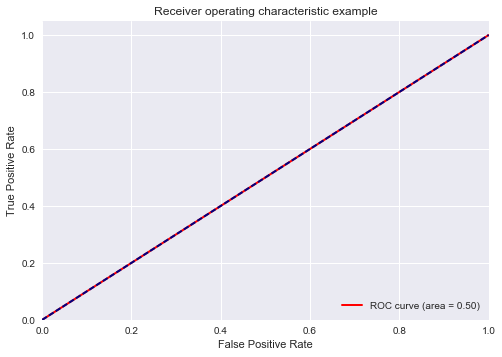

In [46]:
import matplotlib.pyplot as plt
preds = dumb.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [47]:
from sklearn import tree
treesubset = dummydata

In [48]:
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
# Fit the decision tree classifier
ctree.fit(X_train, y_train)
# Create a feature vector
features = treesubset.columns.tolist()

In [49]:
from io import StringIO
out = StringIO()
tree.export_graphviz(ctree, out_file = out)
from sklearn.tree import export_graphviz
export_graphviz(ctree, out_file='decisiontree.dot', feature_names=features)

In [50]:
y_pred_class = ctree.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred_class))
confusion_matrix=metrics.confusion_matrix(y_test, y_dumb_class)
print('Confusion Matrix:', metrics.confusion_matrix(y_test, y_pred_class))
print('Sensitivity:',(confusion_matrix[0,0]/(confusion_matrix[0,1]+ confusion_matrix[0,0])))
print('Specificity:',(confusion_matrix[1,1]/(confusion_matrix[1,1]+ confusion_matrix[1,0])))

Accuracy Score: 0.890151515152
Confusion Matrix: [[6815    0]
 [ 841    0]]
Sensitivity: 1.0
Specificity: 0.0


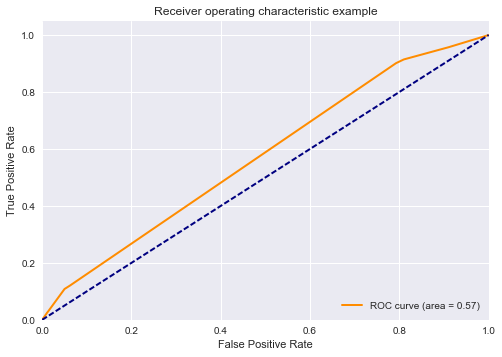

In [51]:
import matplotlib.pyplot as plt
preds = ctree.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Previously exported: 
<img src="assets/img/decisiontree-enrolments.png">

### Logistic Regression
##### Plain ol' logistic regression:

In [52]:
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [53]:
#fit the logreg model and print the coefficients
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(all_ftcolumns, logreg.coef_[0])
print(logreg.fit(X_train, y_train))
y_pred_class = logreg.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print('Confusion Matrix:', confusion_matrix)
print('Sensitivity:',(confusion_matrix[0,0]/(confusion_matrix[0,1]+ confusion_matrix[0,0])))
print('Specificity:',(confusion_matrix[1,1]/(confusion_matrix[1,1]+ confusion_matrix[1,0])))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy Score: 0.890151515152
Confusion Matrix: [[6815    0]
 [ 841    0]]
Sensitivity: 1.0
Specificity: 0.0


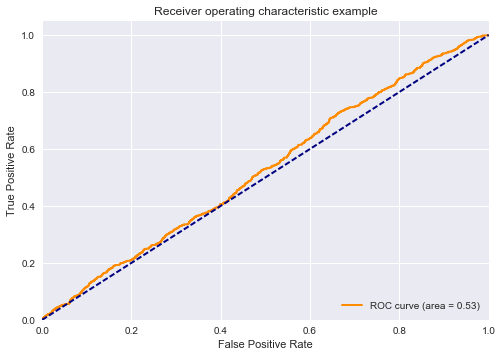

In [54]:
import matplotlib.pyplot as plt
preds = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

* Logistic regression is as good as picking the most frequent class for all of them.
* Really that's all that this is doing right now.

##### Cross-validation doesn't help us much more:

In [55]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[ 0.89291544  0.89291544  0.89291544  0.89291544  0.89320705  0.89320705
  0.89320705  0.89320705  0.89317217  0.89317217]
0.893083431828


In [56]:
print('RMSE (No reg.) =', np.sqrt(metrics.mean_squared_error(y_test,y_pred_class)))

RMSE (No reg.) = 0.33143398264


/anaconda/lib/python3.6/site-packages/sklearn/metrics/regression.py:232: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


#### Adding regularisation

In [57]:
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-5, 5)
rregcv = RidgeCV(normalize=True, scoring='neg_mean_squared_error', alphas=alpha_range)
rregcv.fit(X_train, y_train)

print('Optimal Alpha Value: ', rregcv.alpha_)

preds = rregcv.predict(X_test)
print ('RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Optimal Alpha Value:  0.1
RMSE (Ridge CV reg.) = 0.309318008551


In [58]:
from sklearn.linear_model import LassoCV
alpha_range = 10.**np.arange(-4, 4)
lascv = LassoCV(normalize=True, alphas=alpha_range)
lascv.fit(X_train, y_train)
print('Optimal Alpha Value: ',lascv.alpha_)
lascv.coef_
preds = lascv.predict(X_test)
print('RMSE (Lasso CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))#generate the ROC curve

Optimal Alpha Value:  0.0001
RMSE (Lasso CV reg.) = 0.312205598514


In [59]:
from sklearn.linear_model import ElasticNetCV
alpha_range = 10.**np.arange(-3, 3)
enetCV = ElasticNetCV(normalize=True, alphas=alpha_range)
enetCV.fit(X_train, y_train)
print('Optimal Alpha Value: ',enetCV.alpha_)

enetCV.coef_
preds = enetCV.predict(X_test)
print('RMSE (ENET CV reg.)', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Optimal Alpha Value:  100.0
RMSE (ENET CV reg.) 0.312725243016


### KNN Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(5)
KNN_model.fit(X_train, y_train)
y_pred_class = KNN_model.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print('Confusion Matrix:', confusion_matrix)
print('Sensitivity:',(confusion_matrix[0,0]/(confusion_matrix[0,1]+ confusion_matrix[0,0])))
print('Specificity:',(confusion_matrix[1,1]/(confusion_matrix[1,1]+ confusion_matrix[1,0])))

Accuracy Score: 0.879440961338
Confusion Matrix: [[6719   96]
 [ 827   14]]
Sensitivity: 0.985913426266
Specificity: 0.0166468489893


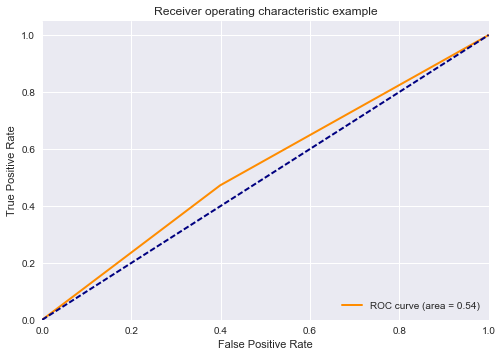

In [61]:
import matplotlib.pyplot as plt
preds = KNN_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Is there a better model?
- Why are we running into so many issues?
- The issue is that the classes are imbalanced. So many models assume an equal number in class A as are in class B, but here there are many more enrolments that become students than become cancellations.

https://svds.com/learning-imbalanced-classes/

### Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=400, max_features=2, oob_score=True, random_state=1,class_weight='balanced')
rfclf.fit(dummydata[all_ftcolumns], dummydata.Cancelled)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=2,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [161]:
rfclf.oob_score_

0.89305074782835869

In [162]:
y_pred_class = rfclf.predict(X)
print('Accuracy Score:', metrics.accuracy_score(y,y_pred_class))
confusion_matrix = metrics.confusion_matrix(y, y_pred_class)
print('Confusion Matrix:',confusion_matrix)
print('Sensitivity:',(confusion_matrix[0,0]/(confusion_matrix[0,1]+ confusion_matrix[0,0])))
print('Specificity:',(confusion_matrix[1,1]/(confusion_matrix[1,1]+ confusion_matrix[1,0])))

Accuracy Score: 0.999836718699
Confusion Matrix: [[27343     5]
 [    0  3274]]
Sensitivity: 0.999817171274
Specificity: 1.0


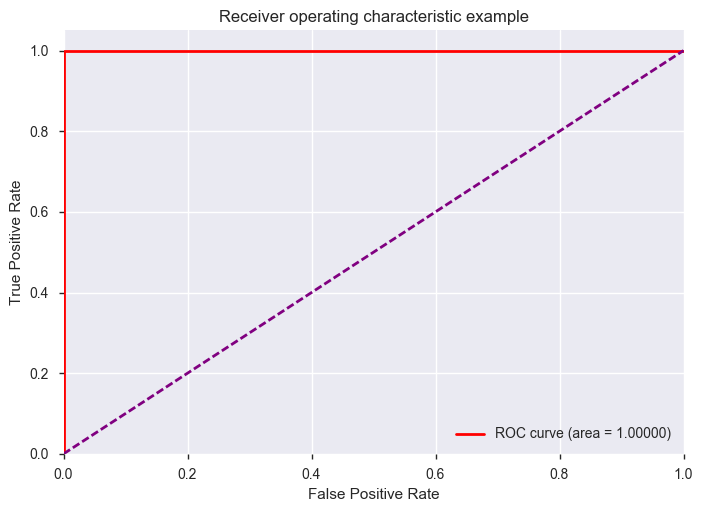

In [163]:
import matplotlib.pyplot as plt
preds = rfclf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='purple', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [164]:
feature_importance = pd.DataFrame({'feature':all_ftcolumns, 'importance':rfclf.feature_importances_})
feature_importance.sort('importance',ascending=False)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,feature,importance
6,DaysLeadtoEnroled,0.071610
7,EnrolDate,0.069455
4,DaysEnroltoStart,0.069159
1,Enddate,0.065344
8,EnrolHour,0.064781
10,EnrolWeek,0.064633
0,Startdate,0.064517
9,Month,0.055121
3,Price,0.031983
5,DaysInvoicetoEnrol,0.023683


## Train-test split

In [138]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=400, max_features=2, oob_score=True,random_state=1,class_weight='balanced',max_depth=10)
rfclf.fit(X_train,y_train)

In [141]:
rfclf.oob_score_

0.52220674039885051

In [142]:
y_pred_class = rfclf.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print('Confusion Matrix:',confusion_matrix)
print('Sensitivity:',(confusion_matrix[0,0]/(confusion_matrix[0,1]+ confusion_matrix[0,0])))
print('Specificity:',(confusion_matrix[1,1]/(confusion_matrix[1,1]+ confusion_matrix[1,0])))

Accuracy Score: 0.533699059561
Confusion Matrix: [[3552 3263]
 [ 307  534]]
Sensitivity: 0.521203228173
Specificity: 0.634958382878


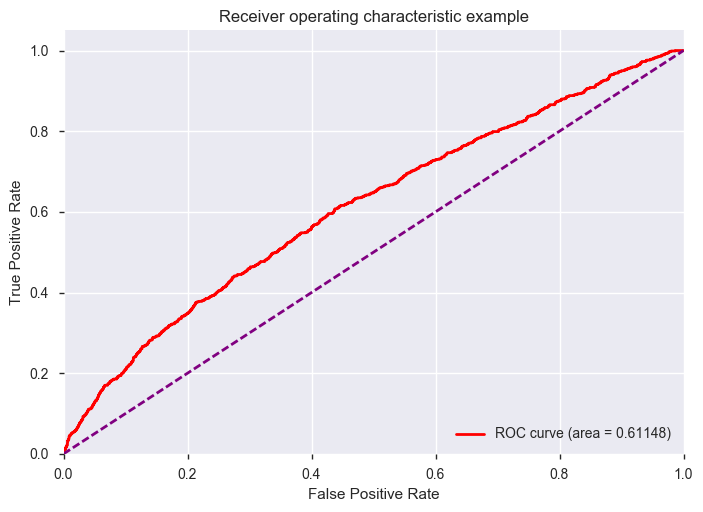

In [143]:
import matplotlib.pyplot as plt
preds = rfclf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='purple', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [144]:
feature_importance = pd.DataFrame({'feature':all_ftcolumns, 'importance':rfclf.feature_importances_})
feature_importance.sort('importance',ascending=False)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,feature,importance
9,Month,0.055966
41,Course_user-experience-design-immersive,0.052572
0,Startdate,0.051925
1,Enddate,0.051452
20,Metro_los-angeles,0.044000
11,Year,0.043036
7,EnrolDate,0.039298
36,Course_ios-development,0.036937
3,Price,0.034148
48,ExpectedPayment_Employer,0.030930


## Cross-validation

In [145]:
all_ftcolumns = dummydata.columns.tolist()
all_ftcolumns.remove('Cancelled')
all_ftcolumns


X = dummydata[all_ftcolumns]
y = dummydata.Cancelled

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=400, max_features=2, oob_score=True,random_state=1,class_weight='balanced',max_depth=2)

In [ ]:
from sklearn import cross_validation
kf = cross_validation.KFold(len(X), n_folds=5, shuffle=True)
from sklearn import linear_model
accuracies = []
confusion_matrice = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf:
    rfclfm = rfclf.fit(X.iloc[train_index], y.iloc[train_index])
    accuracies.append(metrics.accuracy_score(y.iloc[test_index], rfclfm.predict(X.iloc[test_index])))
    confusion_matrice.append(metrics.confusion_matrix(y.iloc[test_index],rfclfm.predict(X.iloc[test_index])))
    n+=1
    print ('Model', n)
    print ('Accuracy:', accuracies[n-1])
    print ('Confusion Matrix',confusion_matrice[n-1])


print ("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print ('Mean of Accuracies for all folds:', np.mean(accuracies))
print ('Mean of Confusion Matrices for all folds:', np.mean(confusion_matrice))

count    30622.000000
mean         3.105218
std          7.586599
min          0.000000
25%          0.000000
50%          0.000000
75%          7.000000
max        119.000000
Name: DaysInvoicetoEnrol, dtype: float64